In [1]:
from google.colab import files
uploaded = files.upload()

Saving arr_big_data.csv to arr_big_data.csv
Saving dep_big_data.csv to dep_big_data.csv


In [4]:
import pandas as pd
data = pd.read_csv('arr_big_data.csv')
pd.DataFrame.from_records(data)
# del data['Unnamed: 0']
# data

,presidents_day,easter,memorial_day,independence_day,labor_day,thanksgiving,winter_holiday,speed,total_dep_delay,total_arr_delay,temp,dew_point_temp,sea_level_pressure,station_pressure,visibilty,wind_speed,prcp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,...,dest_RIC,dest_RNO,dest_ROA,dest_ROC,dest_RSW,dest_SAN,dest_SAT,dest_SAV,dest_SBA,dest_SCK,dest_SDF,dest_SEA,dest_SFB,dest_SFO,dest_SGF,dest_SHV,dest_SIT,dest_SJC,dest_SJU,dest_SLC,dest_SMF,dest_SNA,dest_SRQ,dest_STL,dest_STT,dest_STX,dest_SWF,dest_SYR,dest_TLH,dest_TPA,dest_TRI,dest_TTN,dest_TUL,dest_TUS,dest_TVC,dest_TYS,dest_USA,dest_UST,dest_VPS,dest_XNA
0,0,0,0,0,0,0,0,5.505747,51.0,52.0,39.8,27.2,1033.9,1010.5,10.0,8.6,0.62,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,6.331606,4.0,1.0,62.6,56.1,1022.2,1018.3,6.9,3.9,0.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,8.851301,19.0,-23.0,36.9,14.8,1017.0,938.9,10.0,6.2,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,5.711538,88.0,81.0,50.0,22.1,1019.8,982.4,10.0,5.7,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,4.931507,48.0,19.0,26.3,8.6,1024.6,1023.6,10.0,6.1,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177521,0,0,0,0,0,0,0,5.823529,31.0,4.0,42.2,15.9,1027.5,989.3,10.0,5.3,0.00,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
177522,0,0,0,0,0,0,0,5.743802,24.0,11.0,29.4,23.9,1013.7,977.0,5.2,11.0,0.66,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
177523,0,0,0,0,0,0,0,7.576923,8.0,-21.0,16.3,3.7,1026.0,0.0,10.0,10.7,0.00,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
177524,0,0,0,0,0,0,0,7.267717,27.0,-5.0,50.2,36.8,1016.4,15.9,9.9,12.7,0.08,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Predictions for Arrival Delay

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# data.dropna(axis=0, subset=['total_arr_delay'], inplace=True)

y = data.total_arr_delay
X = data.drop(['total_arr_delay'], axis=1).select_dtypes(exclude=['object'])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=888)

# Mean Absolute Error results

In [0]:
data_dmatrix = xgb.DMatrix(data=X,label=y)
# dtrain = xgb.DMatrix(X_train, label=y_train)
# dtest = xgb.DMatrix(X_test, label=y_test)

In [0]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [0]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [11]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 23.745028


# Using k-fold Cross Validation for model tuning

In [0]:
# params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
#                 'max_depth': 5, 'alpha': 10}

# cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
#                     num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [0]:
params = {"objective":'reg:squarederror','colsample_bytree': 0.3,'learning_rate': 0.35,
                'max_depth': 7, 'alpha': 10, 'subsample': 0.7, 'gamma': 0.1}
cv_results_g1 = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=200,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=100)

In [15]:
cv_results_g1.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,29.512923,0.038624,29.551592,0.161476
1,23.782266,2.543996,23.860410,2.448174
2,22.744114,3.272639,22.890786,3.134779
3,21.819126,3.650699,22.018433,3.552576
4,21.699805,3.681405,21.923173,3.580048


## Better RMSE

In [17]:
print((cv_results_g1["test-rmse-mean"]).tail(1))

199    13.856875
Name: test-rmse-mean, dtype: float64


In [0]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

## Visualize Boosting Trees and Feature Importance

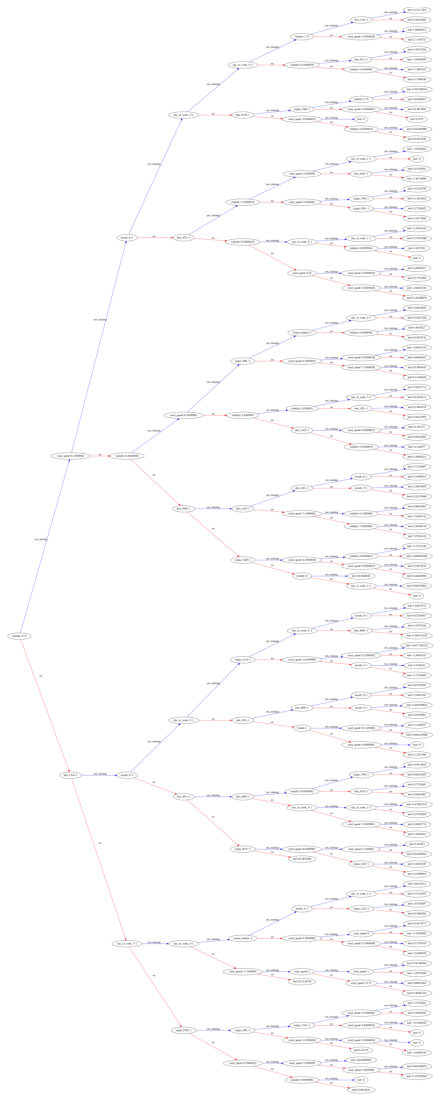

In [20]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = 20,20
plot_tree(xg_reg, num_trees=0, rankdir='LR')
# xgb.plot_tree(xg_reg,num_trees=0)
# xgb.plot_tree(xg_reg, num_trees=0, rankdir='LR')
# plt.show()

### Top Features

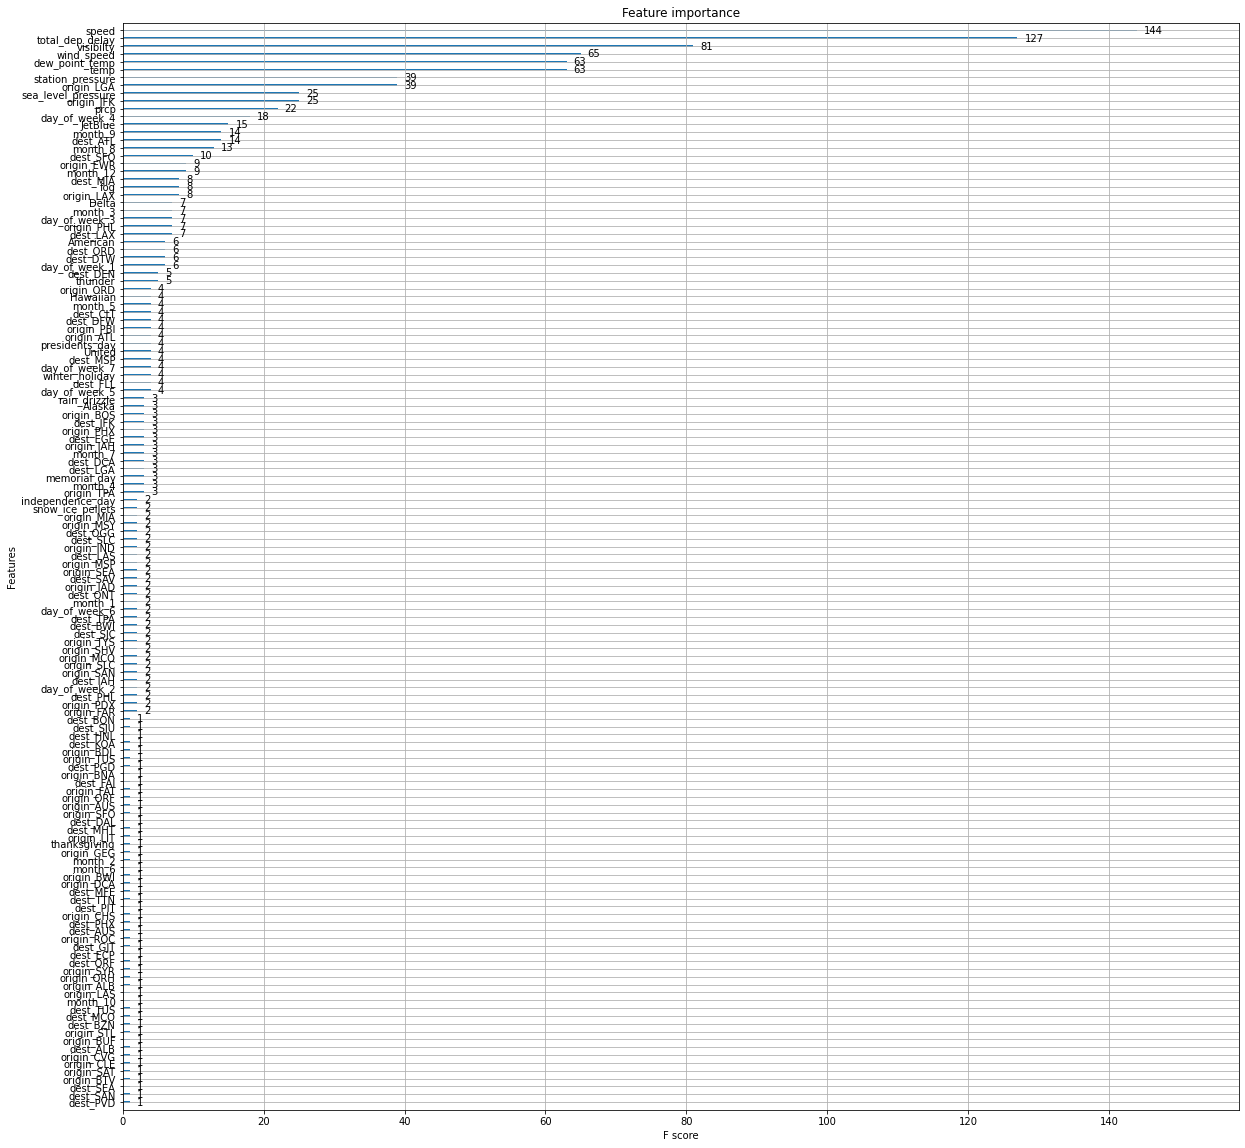

In [21]:
xgb.plot_importance(xg_reg)
plt.rcParams["figure.figsize"] = 20,20
plt.show()

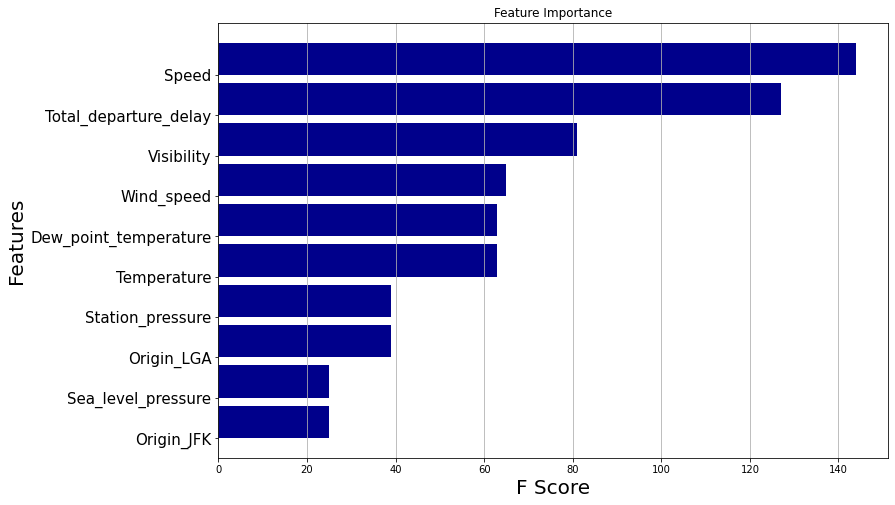

In [76]:
plt.figure(figsize=[12,8])

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
 
label = ['Speed','Total_departure_delay','Visibility','Wind_speed','Dew_point_temperature','Temperature','Station_pressure','Origin_LGA','Sea_level_pressure','Origin_JFK']
x =  [144,127,81,65,63,63,39,39,25,25]
 
idx = np.arange(len(x))
# color = cm.jet(np.array(x)/max(x))
plt.barh(idx, x, color='darkblue')
plt.yticks(idx+0.4,label,fontsize=15)
plt.grid(axis='x')
plt.xlabel('F Score',fontsize=20)
plt.ylabel('Features',fontsize=20)
plt.title('Feature Importance')
plt.gca().invert_yaxis()
 
plt.show()

# Predictions for Departure Delay

In [26]:
import pandas as pd
data = pd.read_csv('dep_big_data.csv')
pd.DataFrame.from_records(data)

,distance,presidents_day,easter,memorial_day,independence_day,labor_day,thanksgiving,winter_holiday,total_dep_delay,temp,dew_point_temp,sea_level_pressure,station_pressure,visibilty,wind_speed,prcp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,...,dest_RIC,dest_RNO,dest_ROA,dest_ROC,dest_RSW,dest_SAN,dest_SAT,dest_SAV,dest_SBA,dest_SCK,dest_SDF,dest_SEA,dest_SFB,dest_SFO,dest_SGF,dest_SHV,dest_SIT,dest_SJC,dest_SJU,dest_SLC,dest_SMF,dest_SNA,dest_SRQ,dest_STL,dest_STT,dest_STX,dest_SWF,dest_SYR,dest_TLH,dest_TPA,dest_TRI,dest_TTN,dest_TUL,dest_TUS,dest_TVC,dest_TYS,dest_USA,dest_UST,dest_VPS,dest_XNA
0,479,0,0,0,0,0,0,0,51.0,39.8,27.2,1033.9,1010.5,10.0,8.6,0.62,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1222,0,0,0,0,0,0,0,4.0,62.6,56.1,1022.2,1018.3,6.9,3.9,0.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2381,0,0,0,0,0,0,0,19.0,36.9,14.8,1017.0,938.9,10.0,6.2,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,594,0,0,0,0,0,0,0,88.0,50.0,22.1,1019.8,982.4,10.0,5.7,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1080,0,0,0,0,0,0,0,48.0,26.3,8.6,1024.6,1023.6,10.0,6.1,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177521,594,0,0,0,0,0,0,0,31.0,42.2,15.9,1027.5,989.3,10.0,5.3,0.00,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
177522,695,0,0,0,0,0,0,0,24.0,29.4,23.9,1013.7,977.0,5.2,11.0,0.66,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
177523,1182,0,0,0,0,0,0,0,8.0,16.3,3.7,1026.0,0.0,10.0,10.7,0.00,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
177524,1846,0,0,0,0,0,0,0,27.0,50.2,36.8,1016.4,15.9,9.9,12.7,0.08,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# data.dropna(axis=0, subset=['total_dep_delay'], inplace=True)

y = data.total_dep_delay
X = data.drop(['total_dep_delay'], axis=1).select_dtypes(exclude=['object'])


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Mean Absolute Error results

In [0]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [0]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [0]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [34]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))


RMSE: 27.676985


# Using k-fold Cross Validation for model tuning

In [0]:
# params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
#                 'max_depth': 5, 'alpha': 10}

# cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
#                     num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [0]:
params = {"objective":'reg:squarederror','colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 7, 'alpha': 10, 'subsample': 0.7, 'gamma': 0.1}
cv_results_g1 = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=200,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=100)

In [36]:
cv_results_g1.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,33.669781,0.044570,33.679391,0.188015
1,32.377024,0.045918,32.402808,0.187011
2,31.299827,0.045561,31.335240,0.183580
3,30.384858,0.045082,30.436723,0.186172
4,29.630687,0.047559,29.693999,0.186524


## Better RMSE

In [39]:
print((cv_results_g1["test-rmse-mean"]).tail(1))

199    25.592875
Name: test-rmse-mean, dtype: float64


In [0]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

## Visualize Boosting Trees and Feature Importance

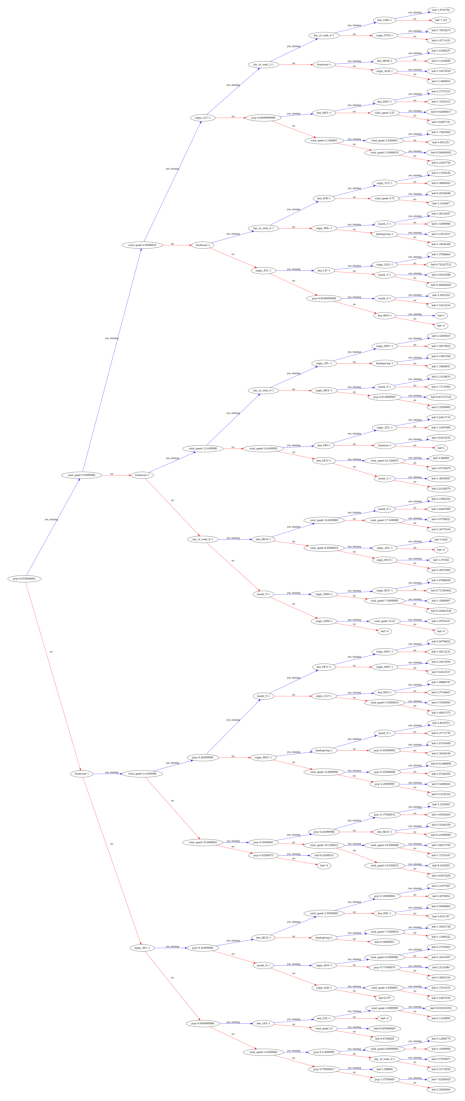

In [41]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = 20,20
plot_tree(xg_reg, num_trees=0, rankdir='LR')
# xgb.plot_tree(xg_reg,num_trees=0)
# xgb.plot_tree(xg_reg, num_trees=0, rankdir='LR')
# plt.show()

### Top Features

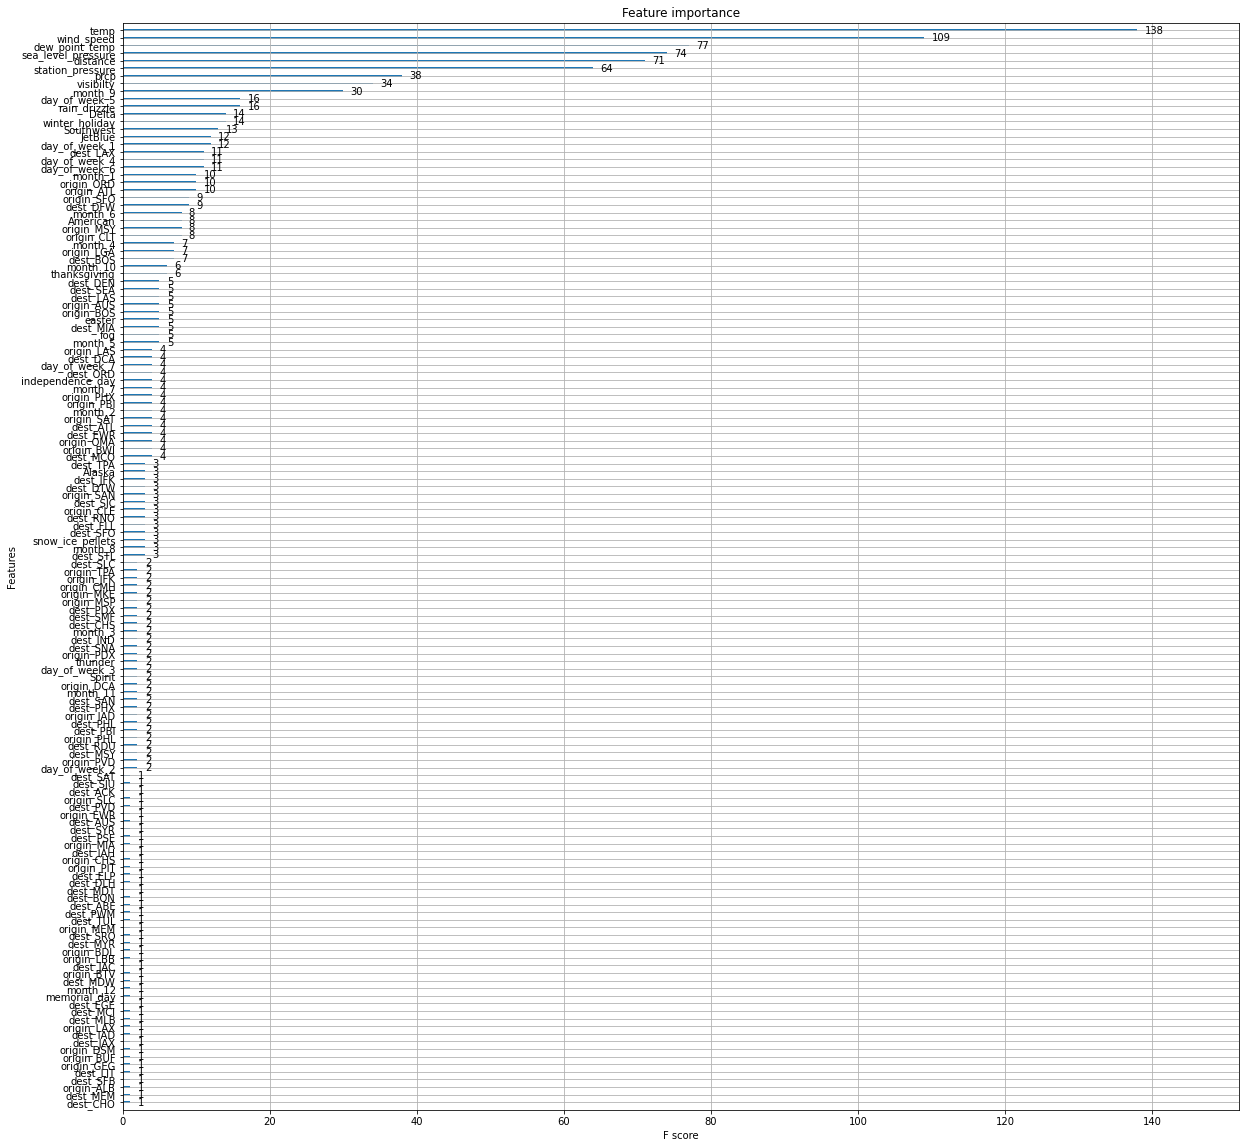

In [42]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

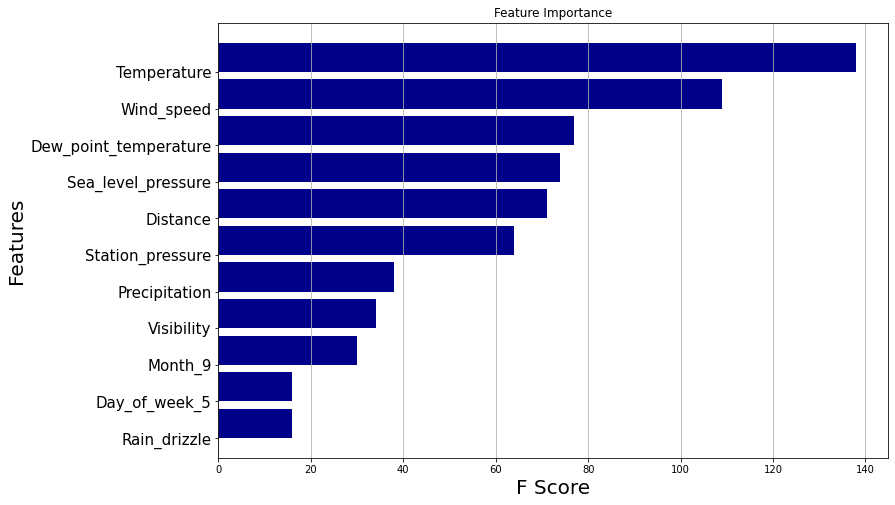

In [77]:
plt.figure(figsize=[12,8])

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
 
label = ['Temperature','Wind_speed','Dew_point_temperature','Sea_level_pressure','Distance','Station_pressure','Precipitation','Visibility','Month_9','Day_of_week_5','Rain_drizzle']
x =  [138,109,77,74,71,64,38,34,30,16,16]
 
idx = np.arange(len(x))
# color = cm.jet(np.array(x)/max(x))
plt.barh(idx, x, color='darkblue')
plt.yticks(idx+0.4,label,fontsize=15)
plt.grid(axis='x')
plt.xlabel('F Score',fontsize=20)
plt.ylabel('Features',fontsize=20)
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()